1. Heart Disease Count By Resting ECG (Restecg)

<Figure size 800x500 with 0 Axes>

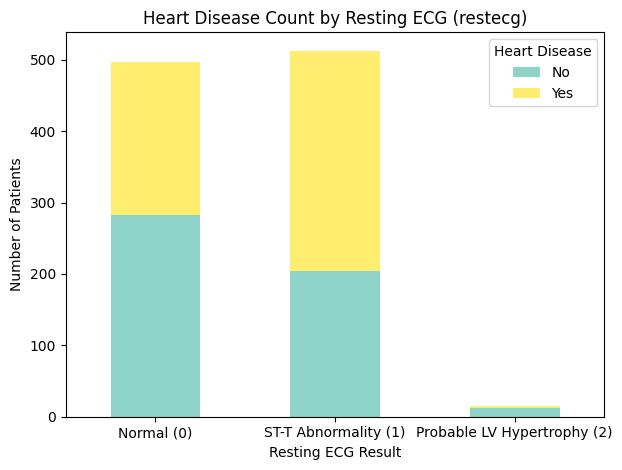

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart.csv")

# Make sure restecg and target are numeric
df['restecg'] = pd.to_numeric(df['restecg'], errors='coerce')
df['target'] = pd.to_numeric(df['target'], errors='coerce')
df = df.dropna(subset=['restecg', 'target'])

# Generate stacked column chart data
restecg_target_counts = df.groupby(['restecg', 'target']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(8, 5))
restecg_target_counts.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Heart Disease Count by Resting ECG (restecg)")
plt.xlabel("Resting ECG Result")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1, 2], labels=[
    "Normal (0)",
    "ST-T Abnormality (1)",
    "Probable LV Hypertrophy (2)"
], rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


2. Proportion Of Heart Disease By Sex

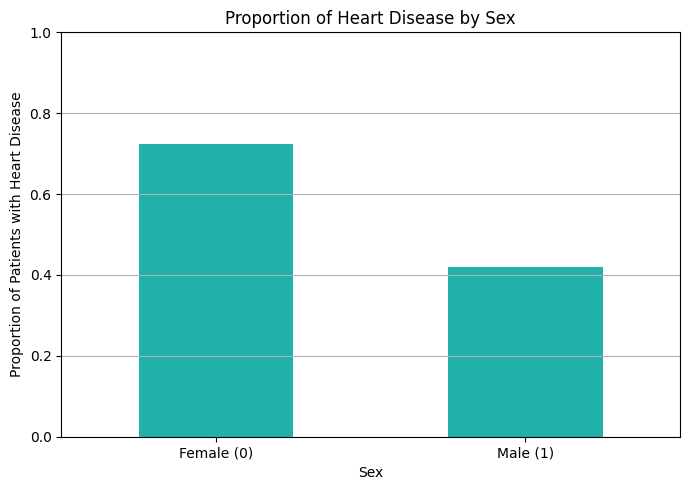

In [2]:
# Generate a cross table of sex and target (count the number of patients by gender)
sex_target_counts = df.groupby(['sex', 'target']).size().unstack(fill_value=0)

# Calculate the proportion of disease in each sex
sex_target_ratio = sex_target_counts.div(sex_target_counts.sum(axis=1), axis=0)

# Draw a bar graph: Prevalence ratio by sex
plt.figure(figsize=(7, 5))
sex_target_ratio[1].plot(kind='bar', color='lightseagreen')
plt.title("Proportion of Heart Disease by Sex")
plt.ylabel("Proportion of Patients with Heart Disease")
plt.xlabel("Sex")
plt.xticks(ticks=[0, 1], labels=["Female (0)", "Male (1)"], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


3. Proportion Of Heart Disease By Chest Pain Type (Cp)

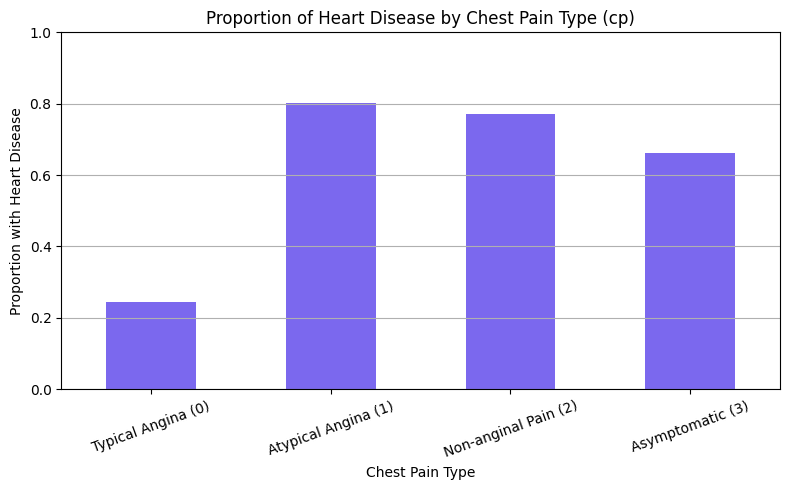

In [3]:
# Generate a cross table of cp and target (number of people with and without chest pain)
cp_target_counts = df.groupby(['cp', 'target']).size().unstack(fill_value=0)

# Calculate the prevalence of each chest pain type
cp_target_ratio = cp_target_counts.div(cp_target_counts.sum(axis=1), axis=0)

# Draw a bar graph to show the incidence rate
plt.figure(figsize=(8, 5))
cp_target_ratio[1].plot(kind='bar', color='mediumslateblue')
plt.title("Proportion of Heart Disease by Chest Pain Type (cp)")
plt.xlabel("Chest Pain Type")
plt.ylabel("Proportion with Heart Disease")
plt.xticks(ticks=[0, 1, 2, 3], labels=[
    "Typical Angina (0)",
    "Atypical Angina (1)",
    "Non-anginal Pain (2)",
    "Asymptomatic (3)"
], rotation=20)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


4. Proportion of heart disease in each type of thal

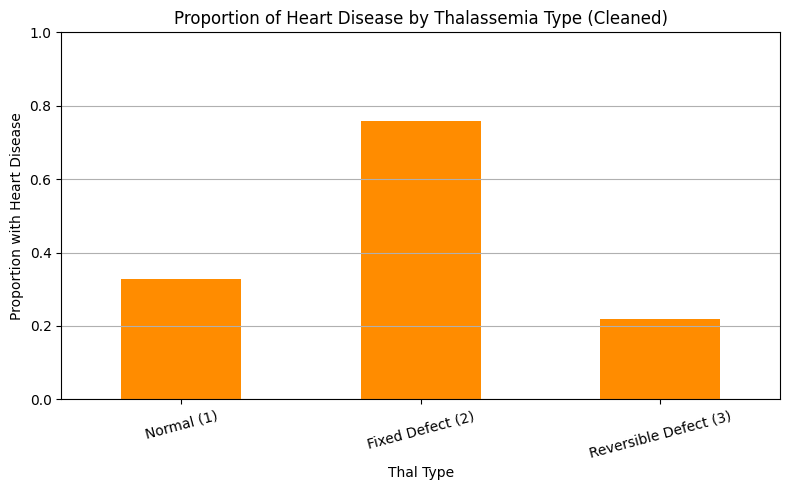

In [4]:
import numpy as np

# Clean the data: treat thal = 0 as an outlier and remove it
df_cleaned = df[df['thal'] != 0]

thal_target_counts_cleaned = df_cleaned.groupby(['thal', 'target']).size().unstack(fill_value=0)

# Calculate the proportion of patients with disease in each type of thal
thal_target_ratio_cleaned = thal_target_counts_cleaned.div(thal_target_counts_cleaned.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(8, 5))
thal_target_ratio_cleaned[1].plot(kind='bar', color='darkorange')
plt.title("Proportion of Heart Disease by Thalassemia Type (Cleaned)")
plt.xlabel("Thal Type")
plt.ylabel("Proportion with Heart Disease")
plt.xticks(ticks=[0, 1, 2], labels=[
    "Normal (1)",
    "Fixed Defect (2)",
    "Reversible Defect (3)"
], rotation=15)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
